In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.optim as optim

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

# 测试集变换，不包括数据增强
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

train_dataset = torchvision.datasets. CIFAR100(root='./data', train=True, download=False, transform=train_transform)
test_dataset = torchvision.datasets.CIFAR100(root='./data', train=False, download=False, transform=test_transform)

In [3]:
import torchvision.models as models
import torch.optim as optim
import torch.nn as nn
import copy
model = models.resnet18(pretrained=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 100)
initial_state = copy.deepcopy(model.state_dict())
model=model.to(device)

c:\anaconda\envs\deepl\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\anaconda\envs\deepl\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [4]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
def train(model,train_dataset,val_dataset,batch_size=32,lr=0.0001,epoch=100):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    train_dataloader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=4)
    val_dataloader=DataLoader(val_dataset,batch_size=batch_size,shuffle=False,num_workers=4)
    losses=[]
    val_losses=[]
    train_acces=[]
    val_acces=[]
    best_acc=0
    best_epoch=0
    for i in range(epoch):
        model.train()
        running_loss = 0
        running_correct = 0
        total_train = 0
        for batch in train_dataloader:
            img,label=batch
            optimizer.zero_grad()
            img=img.to(device)
            label=label.to(device)
            output=model(img)
            train_loss=criterion(output,label)
            train_loss.backward()
            optimizer.step()
            running_loss += train_loss.item() * img.size(0)
            _, predicted = torch.max(output, 1)
            running_correct += (predicted == label).sum().item()
            total_train += label.size(0)
            train_loss = running_loss / total_train
        train_acc = running_correct / total_train
        losses.append(train_loss)
        train_acces.append(train_acc)
        model.eval()
        val_loss = 0
        correct = 0
        total_val = 0
        with torch.no_grad():
            for batch in val_dataloader:
                img, label = batch
                img = img.to(device)
                label = label.to(device)
                output = model(img)
                loss = criterion(output, label)
                val_loss += loss.item() * img.size(0)
                _, predicted = torch.max(output, 1)
                correct += (predicted == label).sum().item()
                total_val += label.size(0)
        val_epoch_loss = val_loss / total_val
        val_losses.append(val_epoch_loss)
        val_epoch_acc = correct / total_val
        val_acces.append(val_epoch_acc)
        print(f'Epoch [{i+1}/{epoch}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}')
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_epoch = i
            best_model_wts = copy.deepcopy(model.state_dict())
    print(f'Best epoch: {best_epoch+1} with accuracy: {best_acc:.4f}')
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Loss over Epochs')
    plt.plot(losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
            
    plt.subplot(1, 2, 2)
    plt.title('Accuracy over Epochs')
    plt.plot(train_acces, label='Train Accuracy')
    plt.plot(val_acces, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    model.load_state_dict(best_model_wts)
    return model

Epoch [1/200], Train Loss: 3.8829, Train Acc: 0.1094, Val Loss: 3.4711, Val Acc: 0.1764
Epoch [2/200], Train Loss: 3.4065, Train Acc: 0.1886, Val Loss: 3.0051, Val Acc: 0.2625
Epoch [3/200], Train Loss: 3.0805, Train Acc: 0.2468, Val Loss: 2.7341, Val Acc: 0.3068
Epoch [4/200], Train Loss: 2.8413, Train Acc: 0.2910, Val Loss: 2.4970, Val Acc: 0.3608
Epoch [5/200], Train Loss: 2.6506, Train Acc: 0.3347, Val Loss: 2.4022, Val Acc: 0.3835
Epoch [6/200], Train Loss: 2.4963, Train Acc: 0.3632, Val Loss: 2.0939, Val Acc: 0.4423
Epoch [7/200], Train Loss: 2.3632, Train Acc: 0.3922, Val Loss: 2.0872, Val Acc: 0.4498
Epoch [8/200], Train Loss: 2.2566, Train Acc: 0.4168, Val Loss: 1.8878, Val Acc: 0.4856
Epoch [9/200], Train Loss: 2.1658, Train Acc: 0.4364, Val Loss: 1.8916, Val Acc: 0.4959
Epoch [10/200], Train Loss: 2.0957, Train Acc: 0.4520, Val Loss: 1.7074, Val Acc: 0.5338
Epoch [11/200], Train Loss: 2.0193, Train Acc: 0.4713, Val Loss: 1.7549, Val Acc: 0.5188
Epoch [12/200], Train Loss: 1.

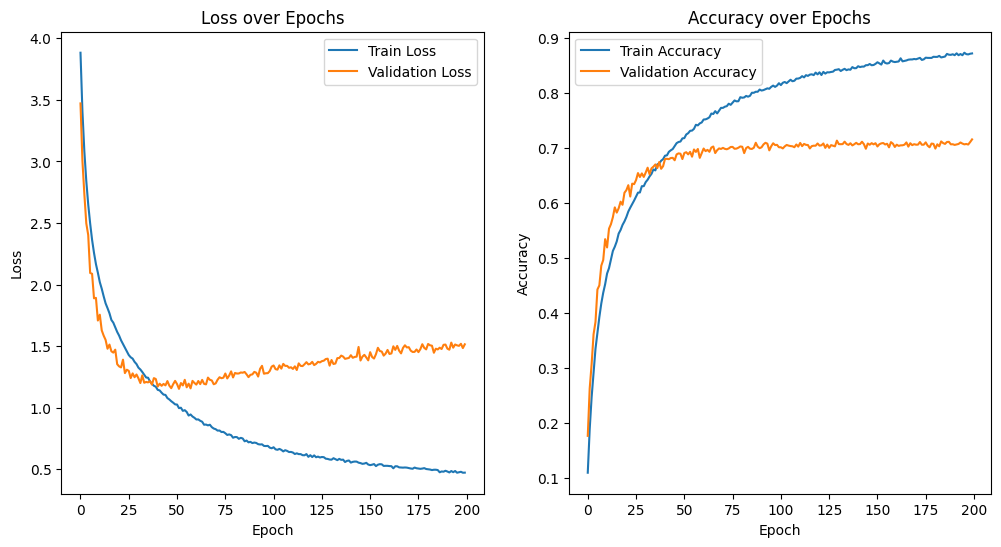

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
train(model,train_dataset=train_dataset,val_dataset=test_dataset,batch_size=32,lr=0.0001,epoch=200)

In [6]:
torch.save(model.state_dict(),'resnet_18_nopre_weights.pth')